In [ ]:
#Ex 1

In [33]:
import pyod
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import scatter

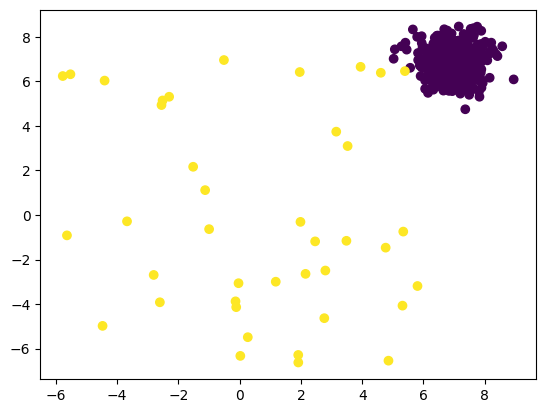

In [11]:
data = pyod.utils.data.generate_data(n_train = 400, n_test = 100)

x_train = data[0]
x_test = data[1]
y_train = data[2]
y_test = data[3]

c_array = [2 if label == 1 else 1 for label in y_train]
scatter(x_train[:, 0],
        x_train[:, 1],
        c = c_array)

plt.show()

In [ ]:
#Ex 2

In [12]:
from pyod.models.knn import KNN

In [13]:
model = KNN(contamination = 0.1)

In [25]:
y_pred_train = model.fit_predict(x_train, y_train)
y_pred_test = model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.12/dist-packages/pyod/models/base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


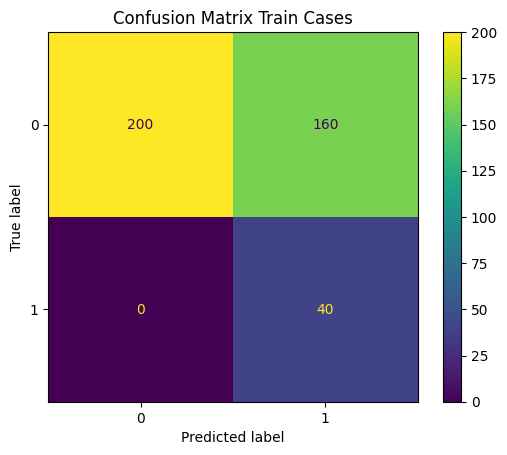

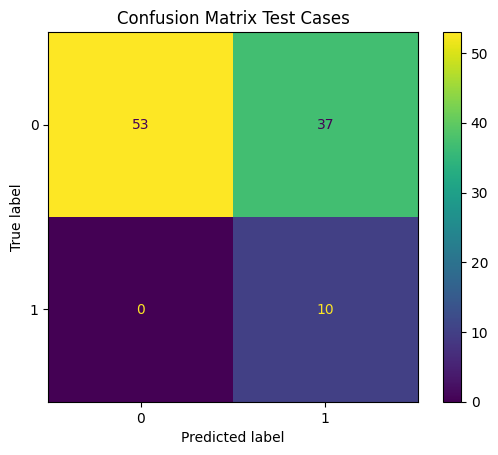


Balanced accuracy train:  0.6


Balanced accuracy test:  0.6063829787234043



In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test  = confusion_matrix(y_test , y_pred_test )

ConfusionMatrixDisplay(cm_train).plot()
plt.title("Confusion Matrix Train Cases")
ConfusionMatrixDisplay(cm_test).plot()
plt.title("Confusion Matrix Test Cases")
plt.show()

tpr = cm_train[0, 0] / (cm_train[0, 0] + cm_train[1, 0])
tnr = cm_train[1, 1] / (cm_train[1, 1] + cm_train[0, 1])

ba = (tpr + tnr) / 2

print(f"""
Balanced accuracy train:  {ba}
""")
tpr = cm_test[0, 0] / (cm_test[0, 0] + cm_test[1, 0])
tnr = cm_test[1, 1] / (cm_test[1, 1] + cm_test[0, 1])

ba = (tpr + tnr) / 2

print(f"""
Balanced accuracy test:  {ba}
""")

In [27]:
from sklearn.metrics import roc_curve, RocCurveDisplay

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


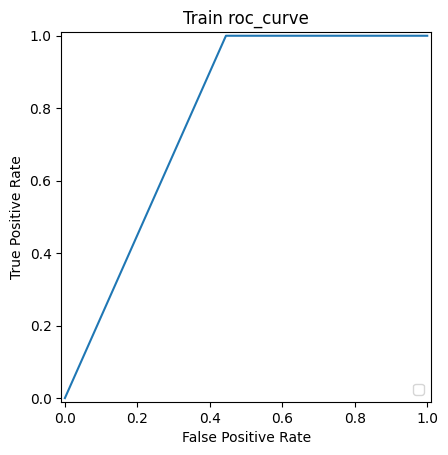

In [28]:
fpr, tpr, _ = roc_curve(y_train, y_pred_train)
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
plt.title("Train roc_curve")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


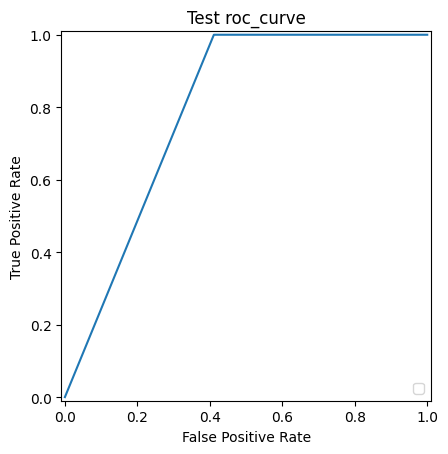

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
plt.title("Test roc_curve")
plt.show()

In [24]:
model = KNN(contamination = 0.5)

In [31]:
#ex 3

In [45]:
from scipy.stats import zscore
from sklearn.metrics import balanced_accuracy_score

In [ ]:
x_train, y_train = pyod.utils.data.generate_data(n_train = 1000, n_features=1, contamination = 0.1, train_only=True)

print(x_train)

In [49]:
z_scores = zscore(x_train)

contamination_rate = 0.1
#thresholdRight = np.quantile(z_scores, 1 - contamination_rate/2)

# Doar valori negative
thresholdLeft  = np.quantile(z_scores, contamination_rate)

#print(thresholdRight, thresholdLeft)

#y_pred = ((z_scores <= thresholdLeft) | (z_scores >= thresholdRight)).astype(int)
y_pred = ((z_scores <= thresholdLeft)).astype(int)

balanced_accuracy_score(y_train, y_pred)

np.float64(0.9666666666666666)

In [ ]:
# Ex 4

In [60]:
# paramaters

n_samples = 1000
contamination = 0.1
dim = 3
np.random.seed(42)

In [61]:
# mean vector and covariance matrix

miu = np.array([3, -4, 9])
sigma = np.array([
    [2.0, 0.5, 0.3],
    [0.5, 1.5, 0.2],
    [0.3, 0.2, 1.0]
])

In [62]:
# generate standard normal samples

x = np.random.randn(n_samples, dim)
print (x)

[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 ...
 [ 0.60211832  0.07203686 -0.21220897]
 [-0.95191846  0.07748052  0.25775254]
 [-1.24176058  0.33417642 -0.15525905]]


In [63]:
# cholensky decomposition
L = np.linalg.cholesky(sigma)

In [64]:
# generate samples

y_inliers = x @ L.T + miu

In [73]:
# generate anomalies

n_outliers = int(contamination * n_samples)
y_outliers = np.random.multivariate_normal(mean = miu + np.array([10, 10, 10]), cov = sigma, size = n_outliers)

In [74]:
# combine samples with anomalies

y_all = np.vstack([y_inliers, y_outliers])
y_true = np.concatenate([np.zeros(n_samples), np.ones(n_outliers)])
p = np.random.permutation(len(y_all))
y_all, y_true = y_all[p], y_true[p]

In [76]:
# compute mean and covariance from my data
mean = np.mean(y_all, axis = 0)
cov = np.cov(y_all, rowvar = False)
inv_cov = np.linalg.inv(cov)

print (inv_cov)

[[ 0.52048064 -0.22058492 -0.27146822]
 [-0.22058492  0.6028375  -0.35245503]
 [-0.27146822 -0.35245503  0.6811402 ]]


In [89]:
# Wanted to add features between one another but I found out about mahalanobis

z_per_feature = zscore(y_all, axis = 0)

z_norm = np.linalg.norm(z_per_feature, axis = 1)

threshold_per_feature = np.quantile(z_norm, 1 - contamination)
y_pred_per_feature = (z_norm > threshold_per_feature).astype(int)

bal_acc_perfeature = balanced_accuracy_score(y_true, y_pred_per_feature)

print("Per-feature z-score (norm) threshold:", threshold_per_feature)
print("Balanced accuracy (per-feature z-norm):", bal_acc_perfeature)

Per-feature z-score (norm) threshold: 1.7035626001226247
Balanced accuracy (per-feature z-norm): 0.995


In [85]:
diff = y_all - mean
mahalanobis = np.sqrt(np.sum(diff @ inv_cov * diff, axis=1))

In [86]:
threshold = np.quantile(mahalanobis, 1 - contamination)
print(f"Mahalanobis threshold for {contamination*100:.0f}% contamination: {threshold:.3f}")

Mahalanobis threshold for 10% contamination: 2.831


In [87]:
y_pred = (mahalanobis > threshold).astype(int)

In [88]:
bal_acc = balanced_accuracy_score(y_true, y_pred)
print(f"Balanced Accuracy: {bal_acc:.3f}")

Balanced Accuracy: 0.962
